In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("HousingData_clean.csv", index_col=0)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
X= df.drop(columns =["MEDV"])
y = df["MEDV"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train , X_test , y_train ,y_test= train_test_split(X,y, test_size=0.3 , random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
model = DecisionTreeRegressor(max_depth=4 , random_state=42)
model.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
mae = mean_absolute_error(y_test,y_pred)
mae

2.776796292821953

In [160]:
mse = mean_squared_error(y_pred,y_test)

In [14]:
r2 = r2_score(y_test , y_pred)
r2

0.8253168657507561

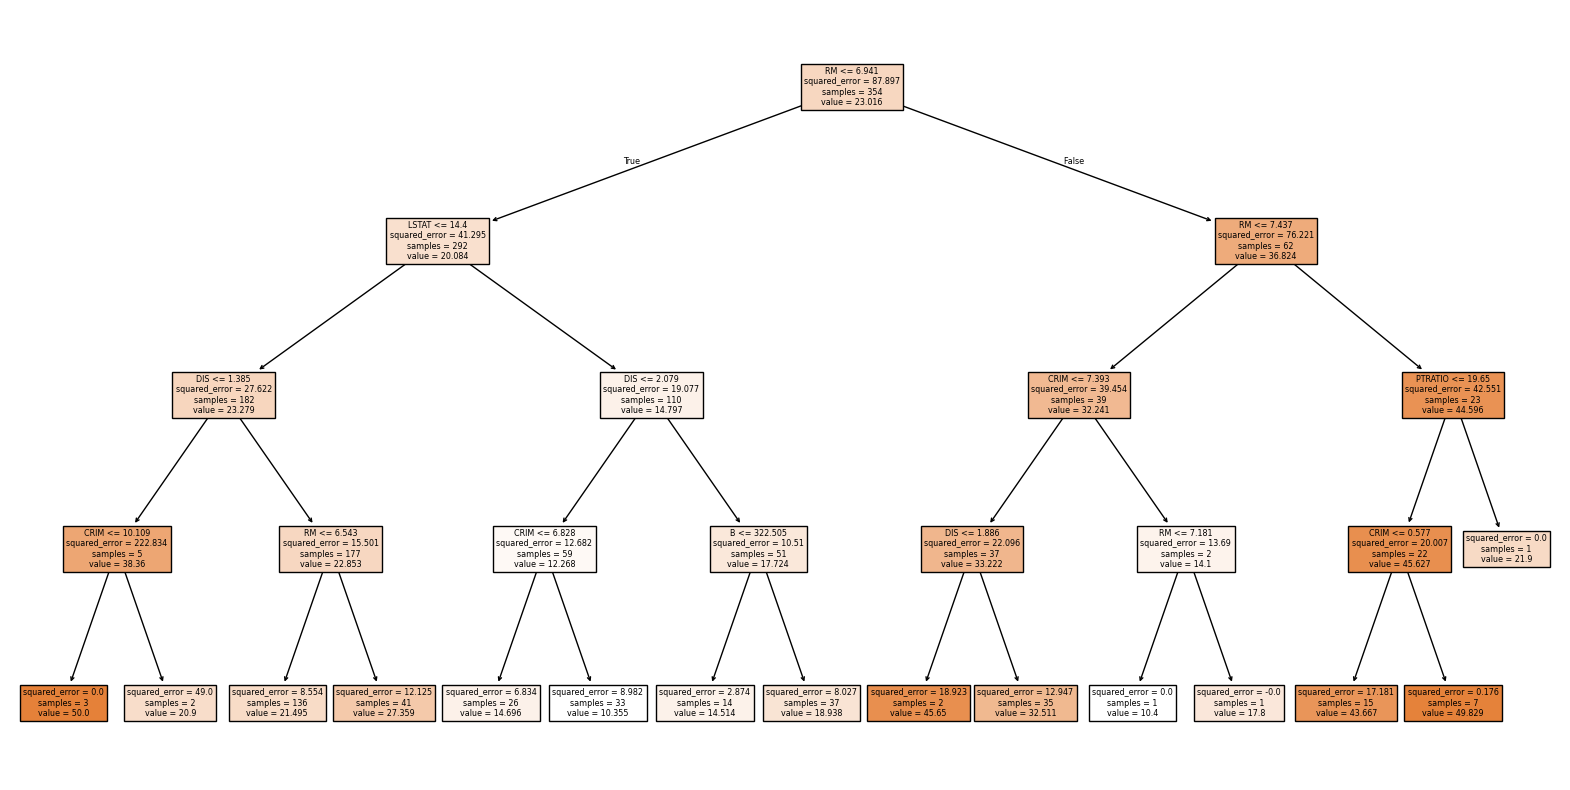

In [15]:
# OverFitting -> Ezberlemek.
from sklearn.tree import plot_tree

plt.figure ( figsize =(20,10))
plot_tree(model , feature_names=X.columns, filled=True)
plt.show()

In [134]:
!pip install seaborn

In [16]:
import seaborn as sb 

<Axes: >

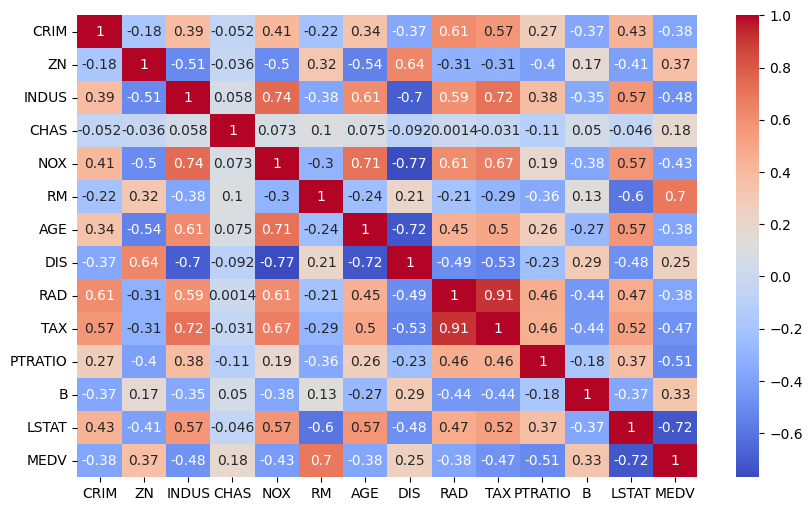

In [17]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [18]:
# GridsearchCV , RandomSearchCV 
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid ={
    "max_depth":list(range(1,1000))
}


In [20]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid, scoring="neg_mean_absolute_error",cv=5) # Griddeki her parametre kombinasyonu için , o kombinasyonla bir model eğit ve 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='neg_mean_absolute_error')

In [21]:
grid.best_estimator_ , grid.best_params_ , grid.best_score_

(DecisionTreeRegressor(max_depth=4),
 {'max_depth': 4},
 np.float64(-3.4168378891894506))

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model2 =RandomForestRegressor(n_estimators=10 , random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [24]:
y_pred2= model2.predict(X_test)

In [25]:
mae2 = mean_absolute_error(y_pred2,y_test)
mse2 = mean_squared_error(y_pred2,y_test)
r2_2 = r2_score(y_pred2,y_test)

In [26]:
"Random Forest" , mae2 , mse2,r2_2

('Random Forest', 2.299342105263158, 12.602425, 0.8046092795387485)

In [28]:
"DT:", mae2,mse2, r2_2

('DT:', 2.299342105263158, 12.602425, 0.8046092795387485)